<a href="https://colab.research.google.com/github/zeeba-tech/data-science/blob/main/Computer_Vision/Lesson_3_fastai_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/rwightman/pytorch-image-models.git

  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-6gcqtqyq
  Running command git clone -q https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-6gcqtqyq
  Created wheel for timm: filename=timm-0.6.2-py3-none-any.whl size=497882 sha256=6dc77c9b4c3b665c60a1bc6a3a6b2ef5e81127da3d8df0a20b2a183a9896b403
  Stored in directory: /tmp/pip-ephem-wheel-cache-qhlikyaj/wheels/a0/ec/5f/289118b747739bb1e02e36cf3d7e759721e881c183653719dc
Successfully built timm


In [ ]:
!pip install fastai -Uqq

     |████████████████████████████████| 197 kB 5.0 MB/s 
     |████████████████████████████████| 60 kB 9.0 MB/s 


In [ ]:
import timm

In [ ]:
from pprint import pprint
model_names = timm.list_models('*convnext*')
pprint(model_names)

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano_hnf',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_hnfd',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']


In [ ]:
from fastcore.all import *
import time

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [ ]:
from fastdownload import download_url
from fastai.vision.all import *

In [ ]:
searches='cheetah','leopard'
path=Path('cheetash_or_leopard')

for o in searches:
    dest=(path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400,dest=path/o)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (125255808 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

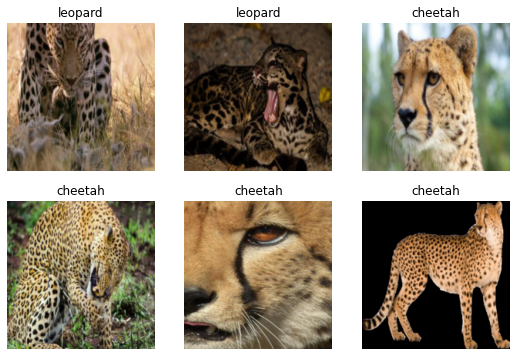

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.932314,0.462989,0.054054,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.534190,0.436184,0.081081,02:42
1,0.489408,0.329644,0.094595,02:46
2,0.424424,0.341195,0.094595,02:45
3,0.361354,0.328299,0.081081,02:44
4,0.328536,0.348060,0.094595,02:45
5,0.291157,0.362852,0.094595,02:46
6,0.270258,0.361143,0.094595,02:50
7,0.252718,0.362125,0.094595,02:46
8,0.232689,0.361853,0.094595,02:47
9,0.222833,0.362305,0.094595,02:46


In [ ]:
learn.model

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
            )
            (1): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 

In [ ]:
m=learn.model

In [ ]:
l=m.get_submodule('0.model.stem.0')

In [ ]:
next(l.parameters())

Parameter containing:
tensor([[[[ 8.3174e-05,  2.4707e-02,  3.7061e-02, -7.2409e-02],
          [-3.7432e-03,  2.5999e-02,  3.1209e-02, -1.4975e-02],
          [-4.6748e-02,  1.4488e-02, -5.2591e-04,  5.8593e-02],
          [-2.7998e-02,  1.1781e-03, -2.7420e-02,  4.6772e-02]],

         [[ 5.7459e-02,  6.2332e-03,  5.8968e-03, -8.4719e-02],
          [ 7.4755e-02,  9.1277e-03, -2.6624e-03, -9.3163e-03],
          [ 3.1291e-03, -2.5281e-02,  3.3676e-02,  1.2600e-02],
          [ 8.7414e-02, -2.7751e-03, -3.8911e-02,  3.4233e-02]],

         [[ 3.8057e-02, -7.6129e-03,  2.8165e-02,  2.3133e-03],
          [ 3.4781e-02, -8.1861e-02, -6.0865e-02,  1.2544e-02],
          [ 5.4892e-02, -7.8819e-02, -5.2473e-02,  6.1818e-02],
          [ 5.4303e-02, -3.0549e-02, -4.3817e-02,  3.3367e-02]]],


        [[[-4.8347e-03, -8.1027e-02,  6.8949e-02,  4.8765e-03],
          [ 7.7179e-02, -1.7348e-02,  1.8802e-02, -6.0540e-02],
          [ 5.1014e-02, -4.1795e-02, -8.2538e-02, -1.0629e-01],
          